---
#REGRESSION & ANALYSIS
---



### 1. Loading Dataset & libraries
---


In [375]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [376]:
#removing warnings
import warnings
warnings.filterwarnings('ignore')

###2. Data Loading
---

In [377]:
from sklearn.datasets import fetch_openml
california = fetch_openml(name="california_housing", version=1, as_frame=True)
#converting to dataframe
df=california.frame

In [378]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


###3. Exploratory Data Analysis
---

In [379]:
#dataset overview
print('No. of rows & columns :',df.shape)
print('\n\n------------------Dataset information--------------------\n')
print(df.info())



No. of rows & columns : (20640, 10)


------------------Dataset information--------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  int64   
 3   total_rooms         20640 non-null  int64   
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  int64   
 6   households          20640 non-null  int64   
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  int64   
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(4), int64(5)
memory usage: 1.4 MB
None


In [380]:
#statistical dscription of dataset
print('          ------------------------------------------------Statistical info of Dataset------------------------------------------------\n')
df.describe()


          ------------------------------------------------Statistical info of Dataset------------------------------------------------



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Missing value in total_bedrroms column is handled using simpleimputer

In [381]:
#Checking missing values
df.isnull().sum()



,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [382]:
#handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df[['total_bedrooms']]=imputer.fit_transform(df[['total_bedrooms']])


In [383]:
#verifying for missing values
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [384]:
#Splitting datasets to features & target
x=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

One hot encoder is used for encoding Ocean_proximity column as it is a categorical and nominal feature

In [385]:
#Encoding

print(df['ocean_proximity'].unique())
# One-hot encode
x = pd.get_dummies(x, columns=['ocean_proximity'], drop_first=True)

# Verify
x.head()

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND
0,-122.23,37.88,41,880,129.0,322,126,8.3252,True,False,False,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,True,False,False,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,True,False,False,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,True,False,False,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,True,False,False,False


Histogram(Visualizing Skewness)

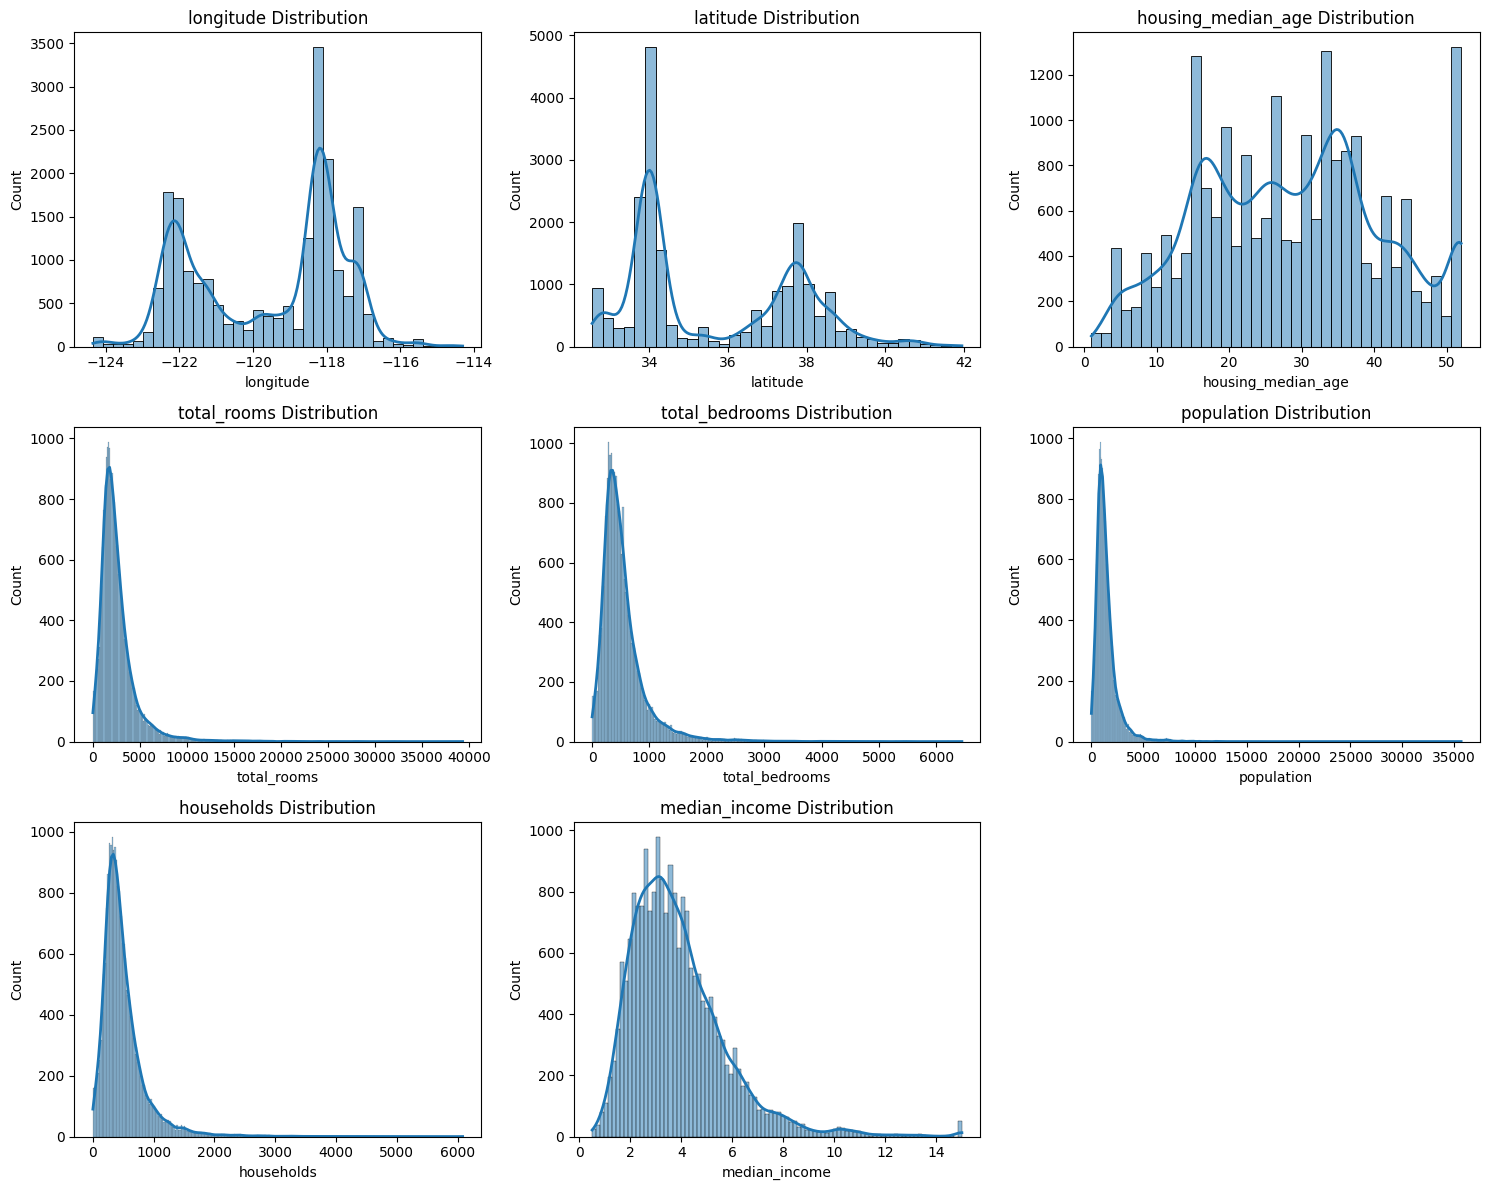

In [388]:
#plotting histograms to see skewness
num_cols = x.select_dtypes(include='number').columns

# Set up the plot grid
n_cols = 3  # number of plots per row
n_rows = int(np.ceil(len(num_cols) / n_cols))
plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, line_kws={'linewidth':2})
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

In [389]:
# checking the value of skewness
sk = ['housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households','median_income']
x[sk].skew()

,0
housing_median_age,0.060331
total_rooms,4.147343
total_bedrooms,3.477023
population,4.935858
households,3.410438
median_income,1.646657


- Many of the importanat features are positively skewed with maximum skewness in population, households, total rooms.
- Skewness indicates the existence of outliers.
(LR & SVR will be affected). It shows the need of skewness handling for them.
- It indicates the real world housing pattaerns which can be handled well by tree based models
- Scaling can reduce the magnitude effect.


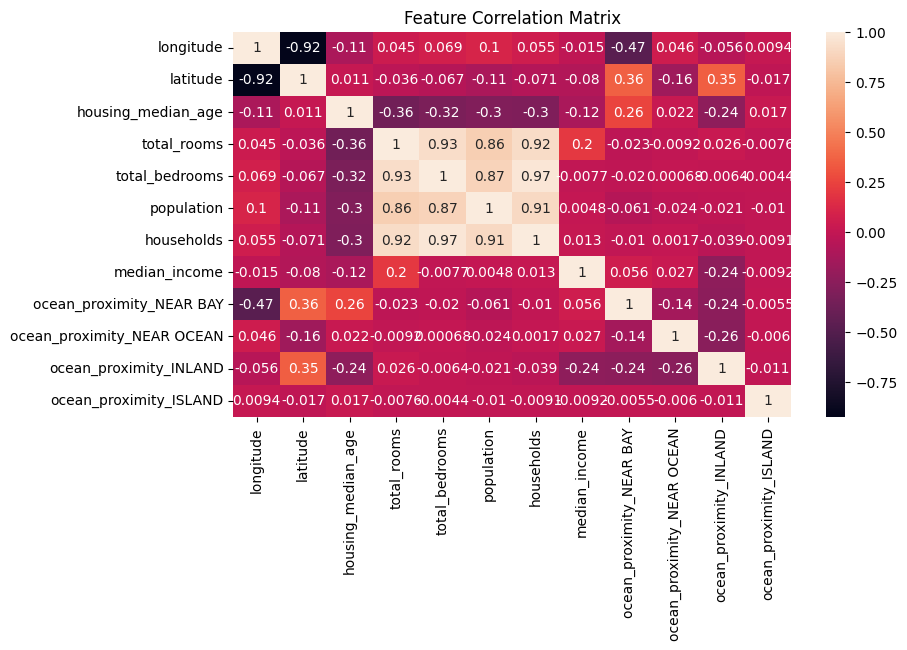

In [390]:
#to visualize correlation between feature column
plt.figure(figsize=(9,5))
sns.heatmap(x.corr(),annot=True)
plt.title('Feature Correlation Matrix')
plt.show()

- Correlation shows the necessity of feature selection as population,total rooms, total bedrooms and households are highly correlated positively.
- Multicollinearity causes overlapping of the informations which is unstable for LR
- Ensemble models can handle this redundancy

**Scaling**: Standardizedscalar is used because it is less sensitive to outliers and preserve the varaince structure of data.

In [391]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

###4. Train test split
---

In [392]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### 5. Regression models
---

### 1. Linear Regression
---
Linear Regression models the relationship between independent variables and the target
variable by fitting a linear equation

**Why suitable for this dataset:**
- Provides a strong baseline model
- Easy to interpret coefficients
- Works well when relationships are approximately linear


### 2. Decision Tree Regressor
---
Decision Tree Regressor predicts values by recursively splitting the data based on feature
conditions, forming a tree structure.

**Why suitable for this dataset:**
- Captures non-linear relationships
- No need for feature scaling
- Easy to interpret decision rules

### 3. Random Forest Regressor
---
Random Forest is an ensemble method that builds multiple decision trees using random
subsets of data and features, and averages their predictions.

**Why suitable for this dataset:**
- Reduces overfitting compared to a single tree
- Handles non-linear patterns effectively
- Performs well on complex datasets like housing data

### 4. Gradient Boosting Regressor
---
Gradient Boosting builds models sequentially, where each new model corrects the errors
made by the previous ones using gradient descent.

**Why suitable for this dataset:**
- High predictive accuracy
- Captures complex feature interactions
- Effective for structured tabular data

### 5. Support Vector Regressor (SVR)
---
SVR finds a function that fits the data within a specified margin of tolerance, using kernel
functions to model non-linear relationships.

**Why suitable for this dataset:**
- Effective in high-dimensional spaces
- Robust to outliers
- Works well after feature scaling

In [393]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

#Decion Tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

#Random forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

#Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred_gb=gb.predict(x_test)

#Support Vector
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred_sv=svr.predict(x_test)

### 6. Model evaluation
---

## Evaluation Metrics used:
- **Mean Squared Error (MSE):** Measures average squared difference between actual and predicted values
- **Mean Absolute Error (MAE):** Measures average absolute prediction error
- **R-squared (R²):** Indicates how well the model explains variance in the target variable

In [394]:
#model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Support Vector Regressor": y_pred_sv
}

print("-"*45 + "\nModel Performance Comparison\n" + "-"*45)

for model_name, y_pred in models.items():
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"{model_name}")
    print(f"R² Score : {r2:.4f}")
    print(f"MSE      : {mse:.2f}")
    print(f"MAE      : {mae:.2f}")
    print("-"*35)



---------------------------------------------
Model Performance Comparison
---------------------------------------------
Linear Regression
R² Score : 0.6257
MSE      : 4904399775.95
MAE      : 50701.78
-----------------------------------
Decision Tree
R² Score : 0.6438
MSE      : 4667434150.33
MAE      : 43409.83
-----------------------------------
Random Forest
R² Score : 0.8179
MSE      : 2386351669.35
MAE      : 31592.55
-----------------------------------
Gradient Boosting
R² Score : 0.7610
MSE      : 3132359468.07
MAE      : 38361.23
-----------------------------------
Support Vector Regressor
R² Score : -0.0421
MSE      : 13655940229.16
MAE      : 86961.41
-----------------------------------


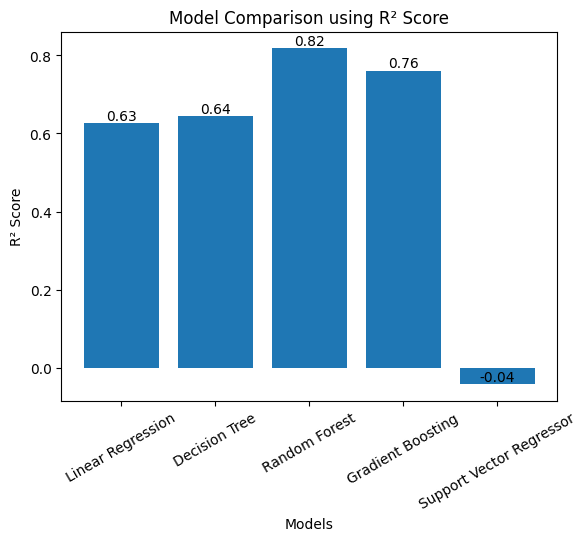

In [395]:
#visualization of performances

model_names = []
r2_scores = []

for name, y_pred in models.items():
    model_names.append(name)
    r2_scores.append(r2_score(y_test, y_pred))

plt.figure()
bars = plt.bar(model_names, r2_scores)

plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Model Comparison using R² Score")
plt.xticks(rotation=30)

# 🔹 Add R² values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval,
        f"{yval:.2f}",
        ha='center',va='bottom'
    )
plt.show()



##Random forest shows the best performance - 82%.
##Support Vector regressor shows the worst as its is prone to outliers.

### 7. Cross validation & Hyper parameter Tuning
---

### Cross-Validation:
**K-fold** cross-validation splits the data into multiple folds and evaluates the model across
different training and validation sets to ensure robust performance.

### Hyperparameter Tuning:Hyperparameters determine model complexity and learning behavior, directly affecting accuracy and generalization.
**RandomizedSearchCV** is used to find the optimal combination of hyperparameters that maximizes
model performance and minimizes overfitting.

In [396]:
#cross valdation
from sklearn.model_selection import KFold,cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

m = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}


print("-" * 45 + "\nK-Fold Cross-Validation Results (R² Score)")

for name, model in m.items():
    cv_scores = cross_val_score(
        model,
        x_train,
        y_train,
        cv=kfold,
        scoring='r2'
    )

    print(f"{name}")
    print(f"Mean R² : {cv_scores.mean():.4f}")
    print("-" * 45)



---------------------------------------------
K-Fold Cross-Validation Results (R² Score)
Linear Regression
Mean R² : 0.6477
---------------------------------------------
Decision Tree
Mean R² : 0.6305
---------------------------------------------
Random Forest
Mean R² : 0.8179
---------------------------------------------
Gradient Boosting
Mean R² : 0.7728
---------------------------------------------
SVR
Mean R² : -0.0496
---------------------------------------------


RandomizedSearchCV performs hyperparameter tuning by randomly sampling parameter combinations and evaluating them using cross-validation. It is computationally efficient compared to GridSearchCV and helps identify optimal model configurations.
**During model evaluation, Random Forest produced the highest R² score and lowest error values compared to other models. Therefore, it was selected for hyperparameter tuning.**

In [406]:
#Hyper parameter tuning for the best model
from sklearn.model_selection import RandomizedSearchCV

# Random Forest model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter search space (KEEP IT SMALL)
param_dist = {
    "n_estimators": [100, 150, 200],
    "max_depth": [20, 30, 40],
    "min_samples_split": [2, 5, 7],
    "min_samples_leaf": [1, 2, 4]

}

# Randomized Search CV
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,          # number of random combinations
    cv=3,               # fewer folds = faster
    scoring="r2",
    n_jobs=-1,
    random_state=42
)

# Fit
rf_search.fit(x_train, y_train)

# Results
print("Best R² Score:", round(rf_search.best_score_, 4))
print("Best Parameters:", rf_search.best_params_)


Best R² Score: 0.8125
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30}


#The Random Forest Regressor was selected as the best model based on higher R² score,

Random Forest Regressor outperformed other models due to its
- ensemble nature,
- ability to capture complex non-linear relationships
-  robustness against overfitting and noise.
These characteristics resulted in a higher R² score and lower error metrics, making it the most suitable model for this dataset.
